<a href="https://colab.research.google.com/github/Mynk-kuswa/Amazon-Sales-Data-Analysis/blob/main/Amazon_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Sales Data Analysis

Import Libraies 

In [1]:
# libraries for data cleaning and Visualizing
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
data = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/SALESDATA.xls"))

In [3]:
data.sample(5)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
2189,10019194,2019-01-20,301.00,2019-01-20,319579,P01,30500,Blue Label Canned Beets,31000,634.11,...,333.11,634.11,272.06,61.05,333.110000,1,108,EA,NaN,NaN
26259,10025919,2017-06-23,887.61,2017-06-23,105776,P01,5742,Red Spade Beef Bologna,2000,115.31,...,1072.66,1960.27,328.16,744.50,63.097647,17,108,EA,NaN,NaN
51079,10005006,2017-11-21,1260.56,2017-11-21,127079,P01,62616,Tell Tale Limes,14000,298.00,...,1123.44,2384.00,762.77,360.67,140.430000,8,167,EA,NaN,NaN
6433,10021986,2019-02-17,222.56,2019-02-17,322037,P01,29754,BBB Best Pepper,11000,485.84,...,263.28,485.84,162.50,100.78,263.280000,1,183,EA,NaN,NaN
13418,10016113,2019-04-01,358.89,2019-04-01,325689,P01,38061,Gorilla Blueberry Yogurt,23000,378.29,...,397.69,756.58,155.33,242.36,198.845000,2,162,EA,NaN,NaN


In [4]:
# brief info of data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [5]:
# number of null values in each column

data.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
Unnamed: 20                         65282
Unnamed: 21                         65278
dtype: int64

In [8]:
print(data['Item Class'].value_counts())
print(data['U/M'].value_counts())

P01    56977
PO1       16
Name: Item Class, dtype: int64
EA    58994
SE     5629
PR      659
Name: U/M, dtype: int64


These columns seems to be not important in analyzing sales data

Remove these columns

1. CustKey - Customer Key
2. Invoice Date - DateKey is already in data
3. Invoice Number -Not useful
4. Item Class - It has only three category [PO1 , P01 and NaN]
5. Line Number : It seems like line number is not useful here.
6. Promised Delivery Date - DateKey is already in data
7. U/M - Not useful                           
8. Unnamed: 20 - filled with most of NAN values               
9. Unnamed: 21 - filled with most of NAN values

In [9]:
# drop unnecessary columns

data = data.drop(['CustKey', 'Invoice Date', 'Invoice Number', 'Item Class', 'Item Number','Line Number','Order Number', 'Promised Delivery Date', 'U/M','Unnamed: 20', 'Unnamed: 21'], axis = 1 )

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateKey                           65282 non-null  datetime64[ns]
 1   Discount Amount                   65280 non-null  float64       
 2   Item                              65282 non-null  object        
 3   List Price                        65282 non-null  float64       
 4   Sales Amount                      65282 non-null  float64       
 5   Sales Amount Based on List Price  65282 non-null  float64       
 6   Sales Cost Amount                 65282 non-null  float64       
 7   Sales Margin Amount               65282 non-null  float64       
 8   Sales Price                       65281 non-null  float64       
 9   Sales Quantity                    65282 non-null  int64         
 10  Sales Rep                         65282 non-nu

In [11]:
# null values

data.isnull().sum()

DateKey                             0
Discount Amount                     2
Item                                0
List Price                          0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         1
Sales Quantity                      0
Sales Rep                           0
dtype: int64

In [14]:
# still 2 Nan in Discount Amount and 1 in Sales Amount
#there is 1 null value in Sales Price column and 2 in Discount Amount in a sale so

data[data['Discount Amount'].isnull() | data['Sales Price'].isnull()]

,DateKey,Discount Amount,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
86,2017-06-13,NaN,Ebony Fresh Lima Beans,0.0,5000.00,0.0,0.0,5000.00,-5000.0,-1,119
34889,2017-08-18,NaN,Monarch Manicotti,0.0,401.86,0.0,0.0,401.86,NaN,0,104


In [19]:
# one row has 0 and one row has -1 quantity
# so both row are not useful in data

data = data[data['Discount Amount'].notnull()]
data = data[data['Sales Price'].notnull()]

In [20]:
data.isnull().sum()

# no null values 

DateKey                             0
Discount Amount                     0
Item                                0
List Price                          0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
dtype: int64

In [21]:
# Use LabelEncoder for Label Encoding "Item" column

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['Item Number'] = labelEncoder.fit_transform(data['Item'])

In [23]:
data = data.reset_index()
data = data.drop('index', axis=1)

In [26]:
# Dimenssion of data

data.shape

(65280, 12)

Vizualizing data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

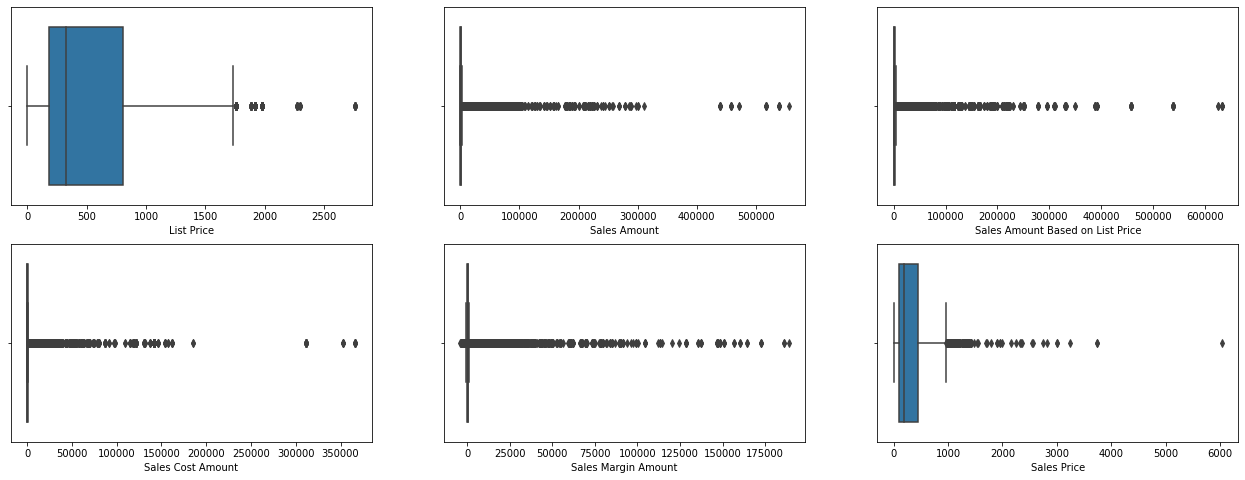

In [ ]:
plt.figure(figsize=(22,8))

plt.subplot(2, 3 ,1)
sns.boxplot(data['List Price']) 

plt.subplot(2, 3 ,2)
sns.boxplot(data['Sales Amount']) 

plt.subplot(2, 3 ,3)
sns.boxplot(data['Sales Amount Based on List Price']) 

plt.subplot(2, 3 ,4)
sns.boxplot(data['Sales Cost Amount']) 

plt.subplot(2, 3 ,5)
sns.boxplot(data['Sales Margin Amount']) 

plt.subplot(2, 3 ,6)
sns.boxplot(data['Sales Price']) 

plt.show()

In [35]:
per_25 = np.percentile(data['Sales Amount'], 25) 
per_75 = np.percentile(data['Sales Amount'], 75)
range_min = [0 , per_75 + (per_75 - per_25)*1.5]
print("Actual range of Sales Amount : ",[0, data['Sales Amount'].max()])
print("Most of Sales Amount Range : ",range_min)
print("\n")

per_25 = np.percentile(data['Sales Amount Based on List Price'], 25) 
per_75 = np.percentile(data['Sales Amount Based on List Price'], 75)
range_min = [0 , per_75 + (per_75 - per_25)*1.5]
print("Actual range of Sales Amount Based on List Price : ",[0, data['Sales Amount Based on List Price'].max()])
print("Most of Sales Amount Based on List Price Range : ",range_min)
print("\n")

per_25 = np.percentile(data['Sales Cost Amount'], 25) 
per_75 = np.percentile(data['Sales Cost Amount'], 75)
range_min = [0 , per_75 + (per_75 - per_25)*1.5]
print("Actual range of Sales Cost Amount : ",[0, data['Sales Cost Amount'].max()])
print("Most of Sales Cost Amount Range : ",range_min)
print("\n")

per_25 = np.percentile(data['Sales Margin Amount'], 25) 
per_75 = np.percentile(data['Sales Margin Amount'], 75)
range_min = [0 , per_75 + (per_75 - per_25)*1.5]
print("Actual range of Sales Margin Amount : ",[0, data['Sales Margin Amount'].max()])
print("Most of Sales Margin Amount Range : ",range_min)
print("\n")

per_25 = np.percentile(data['Sales Price'], 25) 
per_75 = np.percentile(data['Sales Price'], 75)
range_min = [0 , per_75 + (per_75 - per_25)*1.5]
print("Actual range of Sales Price : ",[0, data['Sales Price'].max()])
print("Most of Sales Price Range : ",range_min)
print("\n")

Actual range of Sales Amount :  [0, 555376.0]
Most of Sales Amount Range :  [0, 2737.39875]


Actual range of Sales Amount Based on List Price :  [0, 632610.16]
Most of Sales Amount Based on List Price Range :  [0, 4950.015]


Actual range of Sales Cost Amount :  [0, 366576.0]
Most of Sales Cost Amount Range :  [0, 1466.815]


Actual range of Sales Margin Amount :  [0, 188800.0]
Most of Sales Margin Amount Range :  [0, 1253.5537500000003]


Actual range of Sales Price :  [0, 6035.0]
Most of Sales Price Range :  [0, 970.445]




In [42]:
data[data['Sales Amount'] > 330000].sample(4)

,DateKey,Discount Amount,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Item Number
34620,2019-08-16,18332.8,High Top Dried Mushrooms,33.7,439987.2,458320.0,311589.6,128397.6,32.352,13600,149,386
14007,2019-04-05,18332.8,High Top Dried Mushrooms,33.7,439987.2,458320.0,311589.6,128397.6,32.352,13600,149,386
3003,2019-01-25,21568.0,High Top Dried Mushrooms,33.7,517632.0,539200.0,366576.0,151056.0,32.352,16000,149,386
54012,2019-12-06,18332.8,High Top Dried Mushrooms,33.7,439987.2,458320.0,311589.6,128397.6,32.352,13600,149,386


Observation :-    

Some of rows has Sales Amount higher than normal range because of large number of quantity 

In [43]:
# save this dataframe and use it for further analysis in Power Bi 

data.to_csv('amazon_clean_data.csv')

# download amazon_clean_data.csv file